In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table(r"C:\Users\admin\Desktop\exp1\Iris.data")

In [3]:
df.head()

,"5.1,3.5,1.4,0.2,Iris-setosa"
0,"4.9,3.0,1.4,0.2,Iris-setosa"
1,"4.7,3.2,1.3,0.2,Iris-setosa"
2,"4.6,3.1,1.5,0.2,Iris-setosa"
3,"5.0,3.6,1.4,0.2,Iris-setosa"
4,"5.4,3.9,1.7,0.4,Iris-setosa"


In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
dataset = pd.read_csv(url, names=names)

In [5]:
df = pd.read_table(r"C:\Users\admin\Desktop\exp1\Iris.data",names = names, sep = ',');

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df.pop('target')

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object

In [38]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
df_mean = df.mean()
df_std = df.std()
Z = (df - df_mean) / df_std

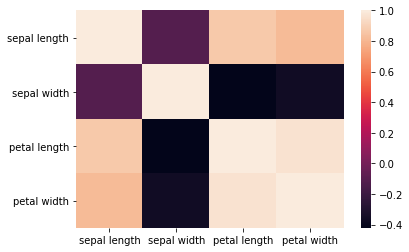

In [40]:
c = Z.cov()

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [42]:
idx = eigenvalues.argsort()[::-1]

eigenvalues = eigenvalues[idx]

eigenvectors = eigenvectors[:,idx]
print(eigenvectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [43]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

In [47]:
n_components = np.argmax(explained_var >= 0.50) + 2
n_components

2

In [48]:
feature_names = list(df)
print(feature_names)

['sepal length', 'sepal width', 'petal length', 'petal width']


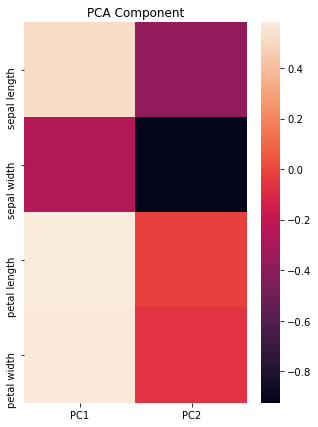

In [49]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u, index = list(df), columns = ['PC1','PC2'])

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [50]:
Z_pca = Z @ pca_component
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)

         PCA1      PCA2
0   -2.256981 -0.504015
1   -2.079459  0.653216
2   -2.360044  0.317414
3   -2.296504  0.573447
4   -2.380802 -0.672514
..        ...       ...
145  1.864277 -0.381544
146  1.553288  0.902291
147  1.515767 -0.265904
148  1.371796 -1.012968
149  0.956096  0.022210

[150 rows x 2 columns]
